In [ ]:
import sympy
from sympy.abc import x, y
import matplotlib.pyplot as plt

$\begin{cases}
\dot{x} = y \\
\dot{y} = -x + y \cdot (1-x^2)
\end{cases}$

In [ ]:
def x_(x, y):
  return y

def y_(x, y):
  return -x + y * (1 - x**2)

In [ ]:
x_ = y
y_ = -x + y * (1 - x**2)

$\begin{cases}
\dot{x} = 0 \\
\dot{y} = 0
\end{cases}$

In [ ]:
# неподвижные точки
pts = sympy.solve([x_(x, y), y_(x, y)], x, y)
print(pts)

[(0, 0)]


$
J =
\left(
  \begin{array}{cc}
    \frac{\partial \dot{x}}{\partial x} \frac{\partial \dot{y}}{\partial x} \\
    \frac{\partial \dot{y}}{\partial x} \frac{\partial \dot{y}}{\partial y}
  \end{array}
\right)
$

In [ ]:
J = sympy.Matrix([[sympy.diff(x_(x, y), x), sympy.diff(x_(x, y), y)],
                  [sympy.diff(y_(x, y), x), sympy.diff(y_(x, y), y)]])
print(J)

Matrix([[0, 1], [-2*x*y - 1, 1 - x**2]])


$ J \rvert_{(x, y) = (x_0, y_0)} $

In [ ]:
jacs = [J.subs([(x, x0), (y, y0)]) for (x0, y0) in pts]
print(jacs)

[Matrix([
[ 0, 1],
[-1, 1]])]


In [ ]:
eigenvals = [list(jac.eigenvals()) for jac in jacs]
print(eigenvals)

[[1/2 - sqrt(3)*I/2, 1/2 + sqrt(3)*I/2]]


In [ ]:
from sympy import re, im

cls = {}
for i, (x0, y0) in enumerate(pts):
  eig = eigenvals[i]
  if (im(eig[0]) == 0 and im(eig[1]) == 0):
    if (re(eig[0]) > 0 and re(eig[1] > 0)):
      cls[(x0, y0)] = 'Unstable node'
    elif (re(eig[0]) < 0 and re(eig[1] < 0)):
      cls[(x0, y0)] = 'Stable node'
    elif (re(eig[0]) > 0 and re(eig[1] < 0) or re(eig[0]) < 0 and re(eig[1] > 0)):
      cls[(x0, y0)] = 'Saddle'
    else:
      cls[(x0, y0)] = 'Unclassified'

  elif (im(eig[0]) == -im(eig[1])):
    if (re(eig[0]) == 0 and re(eig[1]) == 0):
      cls[(x0, y0)] = 'Center'
    elif(re(eig[0]) > 0 and re(eig[1]) > 0):
      cls[(x0, y0)] = 'Unstable focus'
    elif(re(eig[0]) < 0 and re(eig[1]) < 0):
      cls[(x0, y0)] = 'Stable focus'
    else:
      cls[(x0, y0)] = 'Unclassified'

  else:
    cls[(x0, y0)] = 'Unclassified'

print(cls)

{(0, 0): 'Unstable focus'}


In [ ]:
!pip install phaseportrait

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 937.2 kB/s eta 0:00:00


In [ ]:
def syst(x, y):
    return (x_(x, y), y_(x, y))

In [ ]:
import phaseportrait

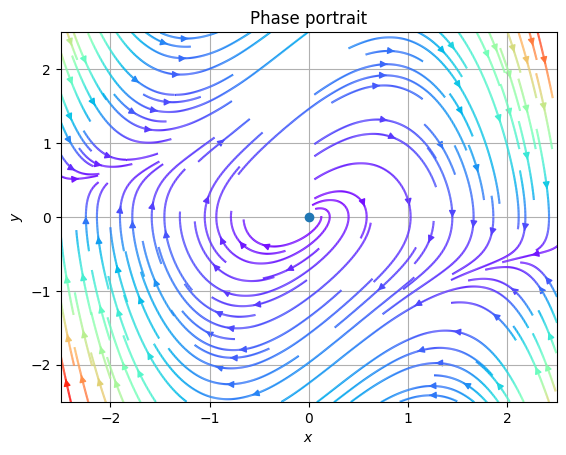

In [ ]:
portrait = phaseportrait.PhasePortrait2D(syst, [-2.5, 2.5], Title='Phase portrait', xlabel=r"$x$", ylabel=r"$y$")
for (x0, y0) in pts:
  plt.plot(x0, y0, 'o')
portrait.plot()
plt.show()

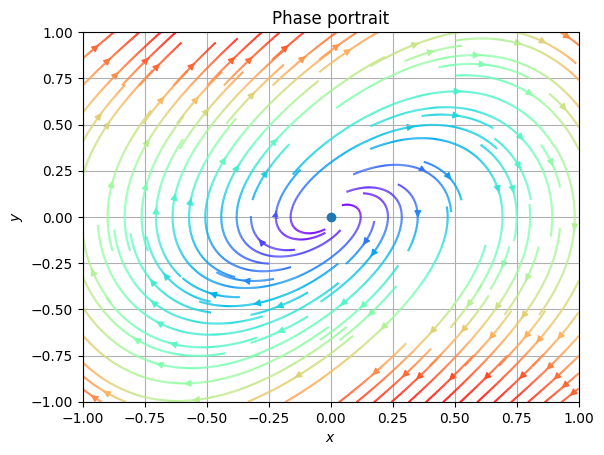

In [ ]:
portrait = phaseportrait.PhasePortrait2D(syst, [-1, 1], Title='Phase portrait', xlabel=r"$x$", ylabel=r"$y$")
for (x0, y0) in pts:
  plt.plot(x0, y0, 'o')
portrait.plot()
plt.show()